In [119]:
import numpy as np
import pandas as pd


## 1. Data Cleaning


In [120]:
df = pd.read_csv("data/spam.csv", encoding="latin-1")


In [121]:
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [122]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


The reason for dropping these columns is that they are unnamed and likely not useful for analysis or modeling purposes. By dropping them, we can simplify the DataFrame and reduce the memory usage. Given the amount of non-null values had been significant in our dataframe, I may have thought of keeping them or doing some research about it. Although, given the number of values that we currently have, I can confidently drop them since they may add little to no value in our analysis.


In [123]:
# drop the last 3 columns using iloc
df = df.iloc[:, :-3]


In [124]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [125]:
df.shape


(5572, 2)

In [126]:
df.sample(5)


,v1,v2
2768,ham,I am on the way to ur home
2440,ham,"Great. I'm in church now, will holla when i ge..."
3202,ham,Haha... Yup hopefully we will lose a few kg b...
4440,ham,I'm going 2 orchard now laready me reaching so...
3758,ham,"GOD ASKED, \What is forgiveness?\"" A little ch..."


In [127]:
# Rename the 'v1' column to 'target' and 'v2' column to 'text'
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

# Print a random sample of 5 rows to confirm the column renaming
df.sample(5)


,target,text
3292,ham,A little. Meds say take once every 8 hours. It...
4083,ham,Quite ok but a bit ex... U better go eat smth ...
5014,ham,I think the other two still need to get cash b...
1829,spam,Hottest pics straight to your phone!! See me g...
4340,ham,ÌÏ all write or wat..


In [128]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [129]:
df['target'] = encoder.fit_transform(df['target'])


In [130]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [131]:
# Count the number of missing values in each column
missing_values = df.isnull().sum()

# Print the results
print("Number of missing values:\n", missing_values)


Number of missing values:
 target    0
text      0
dtype: int64


In [132]:
# Count the number of duplicate rows
num_duplicates = df.duplicated().sum()

# Print the result
print("Number of duplicate rows:", num_duplicates)


Number of duplicate rows: 403


In [133]:
# Remove duplicate rows, keeping the first occurrence
df = df.drop_duplicates(keep='first')

# Print the shape of the DataFrame to confirm the removal of duplicate rows
print("Shape of the DataFrame after removing duplicates:", df.shape)


Shape of the DataFrame after removing duplicates: (5169, 2)


In [134]:
# Count the number of duplicate rows
num_duplicates = df.duplicated().sum()

# Print the result
print("Number of duplicate rows:", num_duplicates)


Number of duplicate rows: 0


## 2. EDA


In [135]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [136]:
df['target'].value_counts()


0    4516
1     653
Name: target, dtype: int64

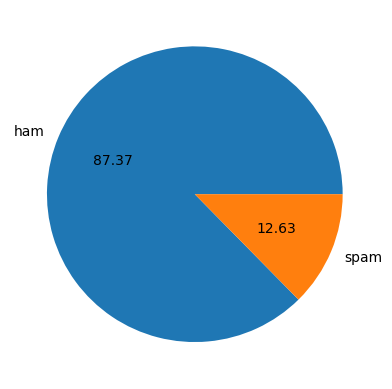

In [137]:
import matplotlib.pyplot as plt

# Create a pie chart of the target column
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")

# Show the pie chart
plt.show()


In [138]:
import nltk


In [139]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/chitralpatil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [140]:
# Define a lambda function to count the number of characters in a text
def count_characters(x): return len(x)


# Apply the lambda function to the text column and store the result in a new column called num_characters
df['num_characters'] = df['text'].apply(count_characters)


In [141]:
# Define a lambda function to count the number of words in a text
def count_words(x): return len(nltk.word_tokenize(x))


# Apply the lambda function to the text column and store the result in a new column called num_words
df['num_words'] = df['text'].apply(count_words)


In [142]:
# Define a lambda function to count the number of sentences in a text
def count_sentences(x): return len(nltk.sent_tokenize(x))


# Apply the lambda function to the text column and store the result in a new column called num_sentences
df['num_sentences'] = df['text'].apply(count_sentences)


In [143]:
df.head()


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [144]:
df[['num_characters', 'num_words', 'num_sentences']].describe()


,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


The `compute_stats` function takes in two arguments: a Pandas DataFrame `df` and a target value `target_value`. The function is designed to compute the descriptive statistics for the columns 'num_characters', 'num_words', and 'num_sentences' using the `.describe()` method on the rows in the `df` DataFrame where the target column matches the specified `target_value`.

The function returns the resulting statistics as a Pandas DataFrame `stats_df`. The function's docstring provides information on the function's parameters, what it does, and what it returns.


In [145]:
def compute_stats(df, target_value):
    """
    Computes descriptive statistics for the columns 'num_characters', 'num_words', and 'num_sentences'
    for the specified target value in the given DataFrame.

    Parameters:
    -----------
    df: Pandas DataFrame
        The DataFrame containing the data to analyze.
    target_value: str
        The target value to analyze (e.g., 'ham' or 'spam').

    Returns:
    --------
    stats_df: Pandas DataFrame
        A DataFrame containing the descriptive statistics for the specified target value.
    """
    stats_df = df.loc[df['target'] == target_value, [
        'num_characters', 'num_words', 'num_sentences']].describe()
    return stats_df


In [146]:
ham_stats = compute_stats(df, 0)
ham_stats


,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [147]:
spam_stats = compute_stats(df, 1)
spam_stats


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [148]:
import seaborn as sns


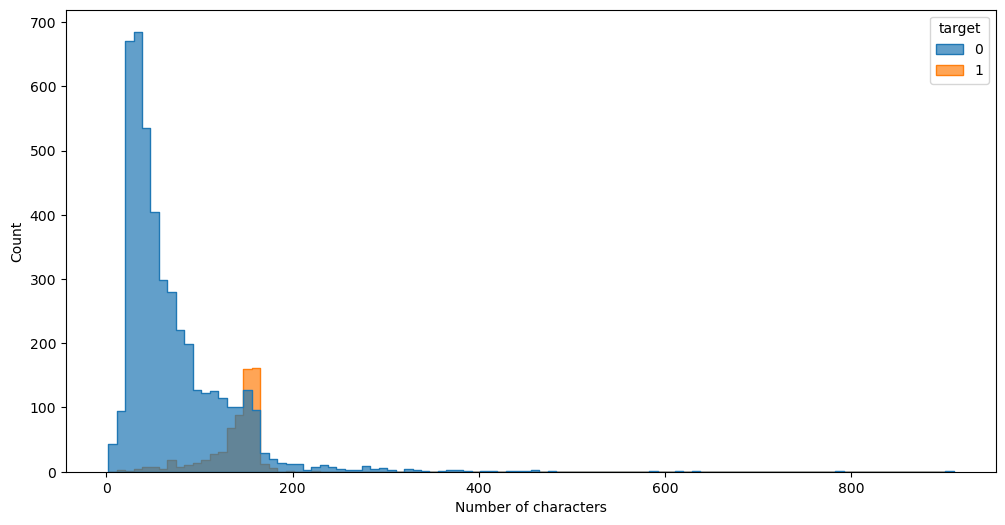

In [149]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='num_characters', hue='target',
             element='step', alpha=0.7, bins=100)

# Add x and y labels to the plot
plt.xlabel('Number of characters')
plt.ylabel('Count')
plt.show()


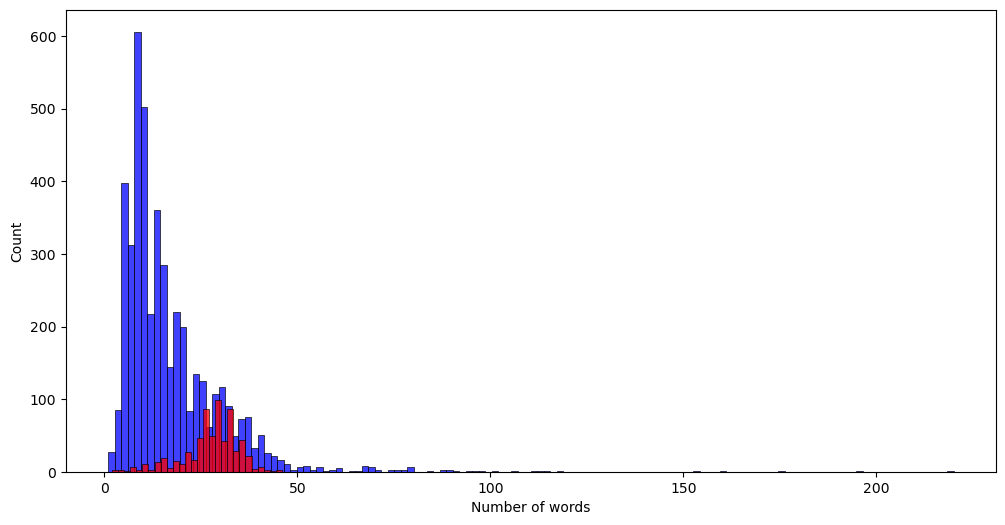

In [150]:
plt.figure(figsize=(12, 6))
for target_value, color in zip([0, 1], ['blue', 'red']):
    sns.histplot(df[df['target'] == target_value]['num_words'], color=color)
    # Add x and y labels to the plot
    plt.xlabel('Number of words')
    plt.ylabel('Count')


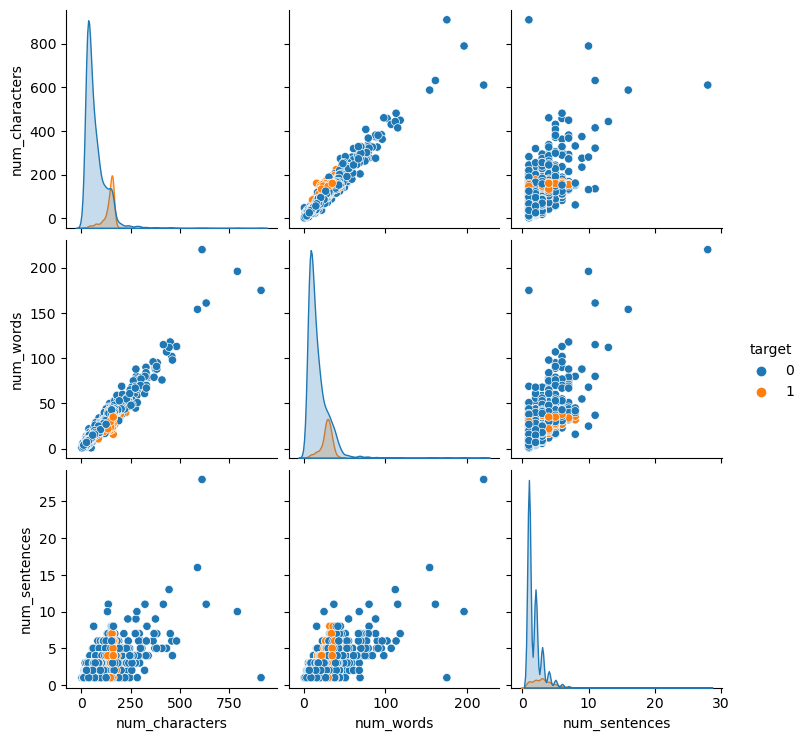

In [151]:
sns.pairplot(df, hue='target')


/var/folders/q4/72ybtynd5sjf5ppl_5vpsw080000gn/T/ipykernel_47952/4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

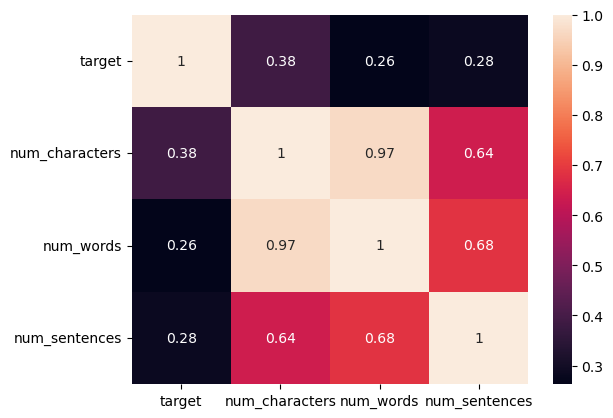

In [152]:
sns.heatmap(df.corr(), annot=True)


## 3. Data Preprocessing
